# **IMPORT LIBRARIES**

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = (12,5)
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import mean_squared_error, explained_variance_score, max_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler

# **LOAD DATA**

In [2]:
# Import the CSV file
df = pd.read_csv("/content/busan_dataset.csv")
df.head()

,Date,SunZenith_KMU,DHI_Average,GHI_Average,DNI_Average,Ambient_Pressure,Un,Uo,Water,Un (atm-cm),...,wv_500,wv_625,CI_Beyer,CI_Perez,CI_Hammer,CI_ESRA,GHI_FARMS /10,GHI_FARMS,Dif,New_CC
0,1/25/18 12:00,55.256931,0,569.444444,0,1020.8,0.376078,320.720975,0.295652,0.000376078,...,0.4999,0.6742,0.191929,0.069673,0.202354,0.179687,496.464006,NaN,72.980438,0.0
1,1/25/18 13:00,54.331137,0,655.555556,0,1019.9,0.376021,320.736450,0.294089,0.000376021,...,0.4999,0.6742,0.208443,0.087683,0.205240,0.198831,498.765527,NaN,156.790029,0.0
2,1/25/18 14:00,57.057826,0,636.111111,0,1019.0,0.375963,320.751925,0.292527,B,...,0.4999,0.6742,0.195137,0.060272,0.197160,0.205699,454.981615,NaN,181.129496,0.0
3,1/25/18 15:00,62.957383,0,622.222222,0,1018.5,0.375906,320.767400,0.290965,0.000375906,...,0.4999,0.6742,0.222392,0.069143,0.596989,0.577235,197.006239,NaN,425.215983,0.0
4,1/25/18 16:00,71.230862,0,413.888889,0,1018.8,0.375849,320.782875,0.289402,0.000375849,...,0.4999,0.6742,0.336698,0.139356,0.347180,0.365768,191.833318,NaN,222.055571,0.0


In [3]:
# Remove spaces on the column
df.columns = df.columns.str.lstrip()
df.columns = df.columns.str.rstrip()

In [4]:
# Parse the "Date" column
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# **DATA EXPLORATION**

In [ ]:
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6647 entries, 2018-01-25 12:00:00 to 2019-12-31 15:00:00
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   SunZenith_KMU     6647 non-null   float64
 1   DHI_Average       6647 non-null   int64  
 2   GHI_Average       6647 non-null   float64
 3   DNI_Average       6647 non-null   int64  
 4   Ambient_Pressure  6647 non-null   float64
 5   Un                6647 non-null   float64
 6   Uo                6647 non-null   float64
 7   Water             6647 non-null   float64
 8   Un (atm-cm)       6647 non-null   object 
 9   Uo (atm-cm)       6647 non-null   float64
 10  AOD               6647 non-null   float64
 11  Alpha             6647 non-null   float64
 12  OT                6647 non-null   float64
 13  wv_500            6647 non-null   float64
 14  wv_625            6647 non-null   float64
 15  CI_Beyer          6647 non-null   float64
 16  CI_Per

In [ ]:
df.head()

,SunZenith_KMU,DHI_Average,GHI_Average,DNI_Average,Ambient_Pressure,Un,Uo,Water,Un (atm-cm),Uo (atm-cm),...,wv_500,wv_625,CI_Beyer,CI_Perez,CI_Hammer,CI_ESRA,GHI_FARMS /10,GHI_FARMS,Dif,New_CC
Date,,,,,,,,,,,,,,,,,,,,,
2018-01-25 12:00:00,55.256931,0,569.444444,0,1020.8,0.376078,320.720975,0.295652,0.000376078,0.320721,...,0.4999,0.6742,0.191929,0.069673,0.202354,0.179687,496.464006,NaN,72.980438,0.0
2018-01-25 13:00:00,54.331137,0,655.555556,0,1019.9,0.376021,320.736450,0.294089,0.000376021,0.320736,...,0.4999,0.6742,0.208443,0.087683,0.205240,0.198831,498.765527,NaN,156.790029,0.0
2018-01-25 14:00:00,57.057826,0,636.111111,0,1019.0,0.375963,320.751925,0.292527,B,0.320752,...,0.4999,0.6742,0.195137,0.060272,0.197160,0.205699,454.981615,NaN,181.129496,0.0
2018-01-25 15:00:00,62.957383,0,622.222222,0,1018.5,0.375906,320.767400,0.290965,0.000375906,0.320767,...,0.4999,0.6742,0.222392,0.069143,0.596989,0.577235,197.006239,NaN,425.215983,0.0
2018-01-25 16:00:00,71.230862,0,413.888889,0,1018.8,0.375849,320.782875,0.289402,0.000375849,0.320783,...,0.4999,0.6742,0.336698,0.139356,0.347180,0.365768,191.833318,NaN,222.055571,0.0


In [ ]:
df.describe()

,SunZenith_KMU,DHI_Average,GHI_Average,DNI_Average,Ambient_Pressure,Un,Uo,Water,Uo (atm-cm),AOD,...,wv_500,wv_625,CI_Beyer,CI_Perez,CI_Hammer,CI_ESRA,GHI_FARMS /10,GHI_FARMS,Dif,New_CC
count,6647.000000,6647.0,6647.000000,6647.0,6647.000000,6647.000000,6647.000000,6647.000000,6647.000000,6647.000000,...,6.647000e+03,6.647000e+03,6647.000000,6647.000000,6647.000000,3208.000000,3208.000000,0.0,3208.000000,3208.000000
mean,51.060330,0.0,422.731642,0.0,1006.121995,0.376902,314.181003,2.153924,0.314181,0.332027,...,4.999000e-01,6.742000e-01,0.328786,0.164718,0.389885,0.351641,378.534722,NaN,103.209254,0.509476
std,18.092119,0.0,276.593287,0.0,7.807684,0.160003,20.866419,1.505452,0.020866,0.322169,...,1.665460e-16,1.110307e-16,0.257296,0.252024,0.312105,0.289786,278.452959,NaN,89.918147,0.406216
min,12.998309,0.0,0.000000,0.0,979.200000,0.213722,280.086209,0.081012,0.280086,0.008354,...,4.999000e-01,6.742000e-01,0.014978,-0.171222,-0.004381,-0.024888,0.006802,NaN,0.105018,0.000000
25%,36.855424,0.0,175.000000,0.0,1000.300000,0.265414,293.672849,0.828799,0.293673,0.133729,...,4.999000e-01,6.742000e-01,0.125161,-0.036668,0.142355,0.114581,135.360061,NaN,33.969374,0.000000
50%,52.988619,0.0,400.000000,0.0,1005.500000,0.333155,317.962151,1.769083,0.317962,0.245290,...,4.999000e-01,6.742000e-01,0.239890,0.082875,0.277230,0.263806,328.336472,NaN,78.043422,0.600000
75%,64.881856,0.0,638.888889,0.0,1011.200000,0.458593,334.272711,3.388043,0.334273,0.390532,...,4.999000e-01,6.742000e-01,0.509362,0.345438,0.612981,0.561245,591.146724,NaN,151.186828,0.900000
max,84.992310,0.0,1088.888889,0.0,1034.500000,1.128154,342.529169,5.658164,0.342529,3.674310,...,4.999000e-01,6.742000e-01,2.530834,1.524264,2.617011,2.246217,1060.470970,NaN,494.122077,1.000000


In [5]:
# Check null value
df.isna().sum()

,0
SunZenith_KMU,0
DHI_Average,0
GHI_Average,0
DNI_Average,0
Ambient_Pressure,0
Un,0
Uo,0
Water,0
Un (atm-cm),0
Uo (atm-cm),0


In [ ]:
# fill the nan values by upper row value
#df = df.fillna(method='ffill')
#df.tail()

# **DATA ENGINEERING**

In [6]:
# Extracting features from the index before filtering the DataFrame
df['hour'] = df.index.hour
df['month'] = df.index.month

In [7]:
# Now filter the DataFrame to include only the required columns and the new features
required_cols = ['GHI_Average', 'SunZenith_KMU', 'Ambient_Pressure', 'Water', 'AOD', 'wv_500', 'CI_Beyer', 'hour', 'month']
df = df[required_cols]

# Display the first few rows to confirm the columns are present
print(df.head())

                     GHI_Average  SunZenith_KMU  Ambient_Pressure     Water  \
Date                                                                          
2018-01-25 12:00:00   569.444444      55.256931            1020.8  0.295652   
2018-01-25 13:00:00   655.555556      54.331137            1019.9  0.294089   
2018-01-25 14:00:00   636.111111      57.057826            1019.0  0.292527   
2018-01-25 15:00:00   622.222222      62.957383            1018.5  0.290965   
2018-01-25 16:00:00   413.888889      71.230862            1018.8  0.289402   

                          AOD  wv_500  CI_Beyer  hour  month  
Date                                                          
2018-01-25 12:00:00  0.092994  0.4999  0.191929    12      1  
2018-01-25 13:00:00  0.093331  0.4999  0.208443    13      1  
2018-01-25 14:00:00  0.093668  0.4999  0.195137    14      1  
2018-01-25 15:00:00  0.094004  0.4999  0.222392    15      1  
2018-01-25 16:00:00  0.094341  0.4999  0.336698    16      1  


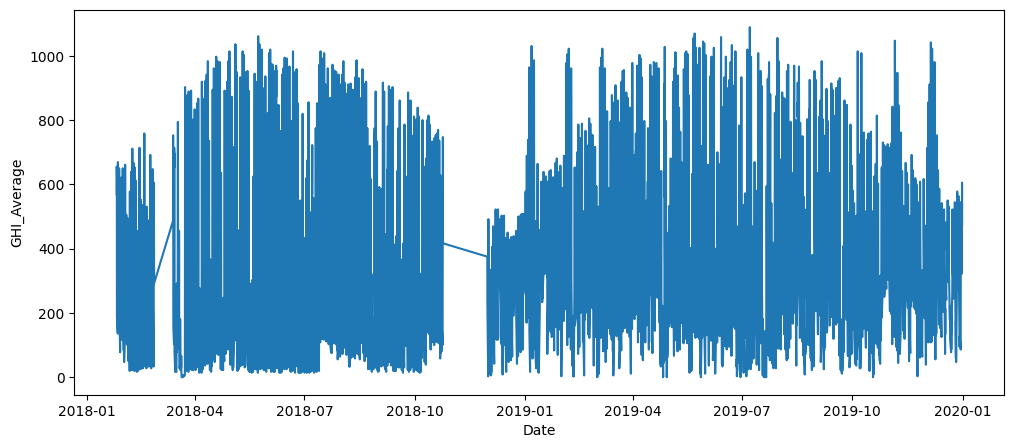

In [8]:
sns.lineplot(x=df.index, y='GHI_Average', data=df)
plt.show()

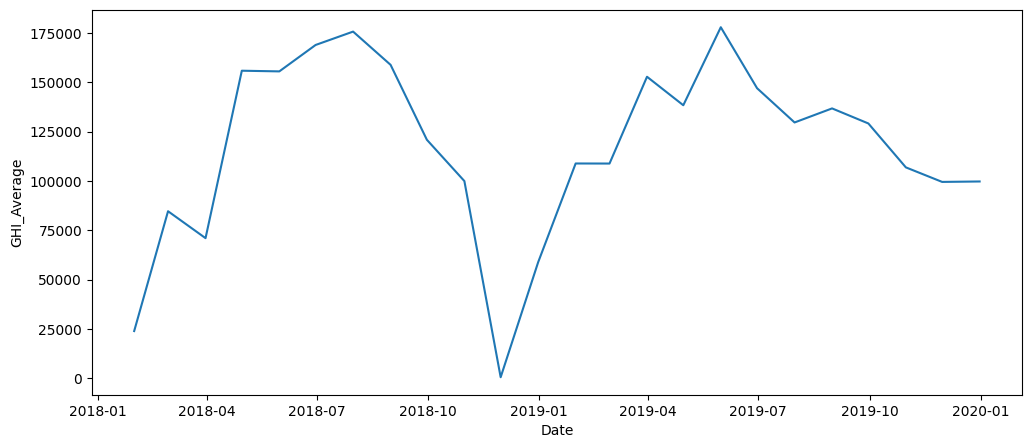

In [9]:
df_by_month = df.resample('M').sum()
sns.lineplot(x=df_by_month.index, y='GHI_Average', data=df_by_month)
plt.show()

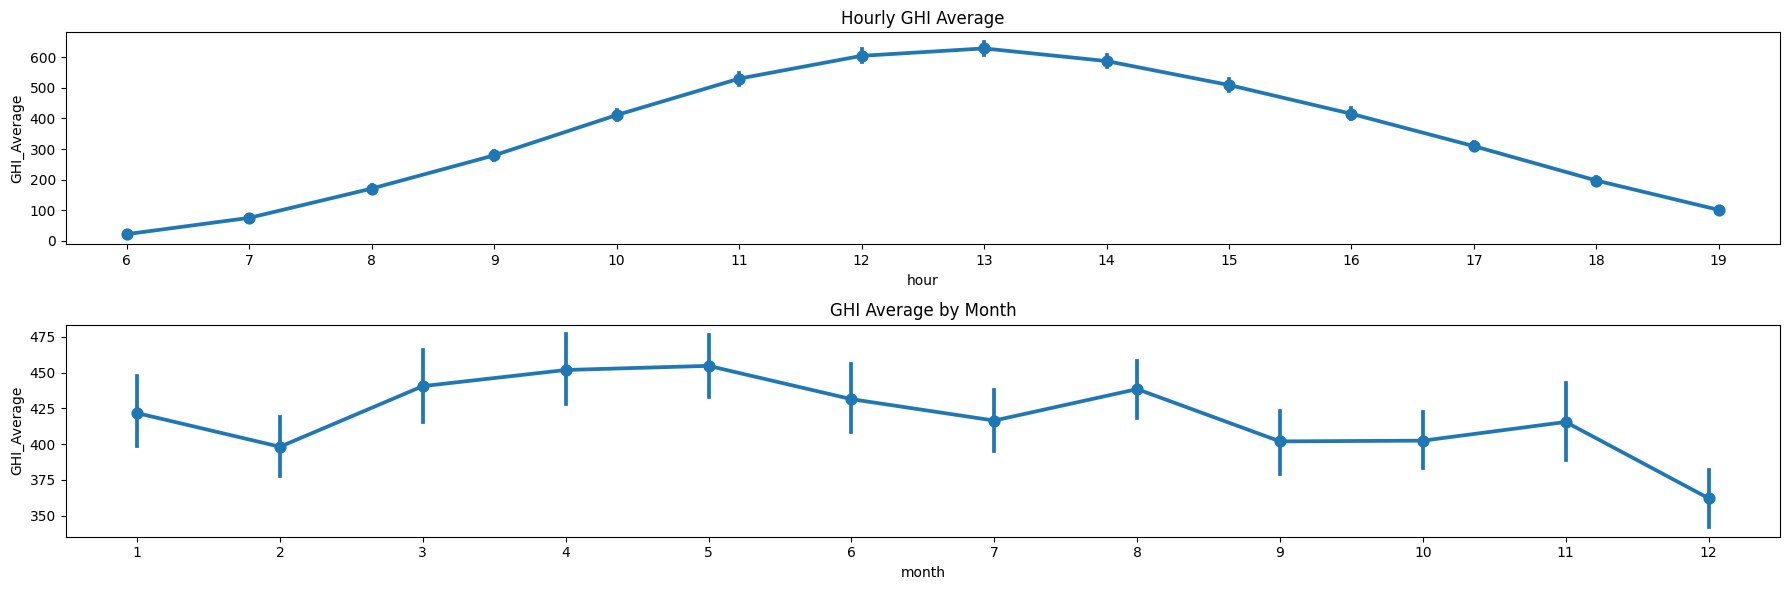

In [10]:
# Create a figure with 4 subplots (2 rows, 2 columns)
fig, axs = plt.subplots(2, figsize=(18, 6))

# Ensure that axs is a flat array, in case it isn't already
if isinstance(axs, np.ndarray):
    axs = axs.flatten()

# Plot 1: Hourly GHI Average
sns.pointplot(x='hour', y='GHI_Average', data=df, ax=axs[0])
axs[0].set_title('Hourly GHI Average')

# Plot 2: GHI Average by Month
sns.pointplot(x='month', y='GHI_Average', data=df, ax=axs[1])
axs[1].set_title('GHI Average by Month')

# Show the plots
plt.tight_layout()
plt.show()

# **DATA PREPROCESSING**

Split Data into 70% training, 15% test, and 15% validation

In [11]:
# Define split ratios
train_ratio = 0.7
test_ratio = 0.15
validation_ratio = 0.15

# Calculate the sizes of each set
train_size = int(len(df) * train_ratio)
test_size = int(len(df) * test_ratio)
validation_size = len(df) - train_size - test_size  # Remaining data for validation

# Split the dataset
train = df.iloc[:train_size]
test = df.iloc[train_size:train_size + test_size]
validation = df.iloc[train_size + test_size:]

# Print the sizes of each set
print('Train size:', len(train))
print('Test size:', len(test))
print('Validation size:', len(validation))

Train size: 4652
Test size: 997
Validation size: 998


In [12]:
# Input Scaling
cols = ['SunZenith_KMU', 'Ambient_Pressure', 'Water', 'AOD', 'wv_500', 'CI_Beyer', 'hour', 'month']

scaler = RobustScaler()
scaler = scaler.fit(np.asarray(train[cols]))

train.loc[:, cols] = scaler.transform(np.asarray(train[cols]))
test.loc[:, cols] = scaler.transform(np.asarray(test[cols]))

In [13]:
# scaling GHI
GHI_scaler = RobustScaler()
GHI_scaler = GHI_scaler.fit(train[['GHI_Average']])
train['GHI_Average'] = GHI_scaler.transform(train[['GHI_Average']])
test['GHI_Average'] = GHI_scaler.transform(test[['GHI_Average']])

In [14]:
print('Train shape:',train.shape)
print('Test shape:', test.shape)

Train shape: (4652, 9)
Test shape: (997, 9)


# **MODEL BUILDING**

In [15]:
def create_dataset(X, y, time_steps=1):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        v = X.iloc[i:(i + time_steps)].values
        Xs.append(v)
        ys.append(y.iloc[i + time_steps])
    return np.array(Xs), np.array(ys)

In [16]:
time_steps = 7
# reshape to [samples, time_steps, features]
X_train, y_train = create_dataset(train, train.GHI_Average, time_steps)
X_test, y_test = create_dataset(test, test.GHI_Average, time_steps)
print(X_train.shape, y_train.shape)

(4645, 7, 9) (4645,)


# **GRU**

In [17]:
# GRU model design

gru_model = tf.keras.Sequential()
gru_model.add(tf.keras.layers.GRU(units=100, input_shape=(X_train.shape[1], X_train.shape[2])))
gru_model.add(tf.keras.layers.Dropout(rate=0.5))
gru_model.add(tf.keras.layers.Dense(units=1))
gru_model.compile(loss='mean_squared_error', optimizer='adam')
gru_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ gru (GRU)                            │ (None, 100)                 │          33,300 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │             101 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 33,401 (130.47 KB)

 Trainable params: 33,401 (130.47 KB)

 Non-trainable params: 0 (0.00 B)

In [18]:
gru_history = gru_model.fit(X_train, y_train,epochs=100,batch_size=64,validation_split=0.15,shuffle=False)

Epoch 1/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.2381 - val_loss: 0.1100
Epoch 2/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.1040 - val_loss: 0.0791
Epoch 3/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0814 - val_loss: 0.0714
Epoch 4/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0684 - val_loss: 0.0619
Epoch 5/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 0.0595 - val_loss: 0.0581
Epoch 6/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0559 - val_loss: 0.0551
Epoch 7/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0522 - val_loss: 0.0505
Epoch 8/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0483 - val_loss: 0.0467
Epoch 9/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0452 - val_loss: 0.0466
Epoch 10/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0451 - val_loss: 0.0458
Epoch 11/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0438 - val_loss: 0.0445
Epoch 12/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step

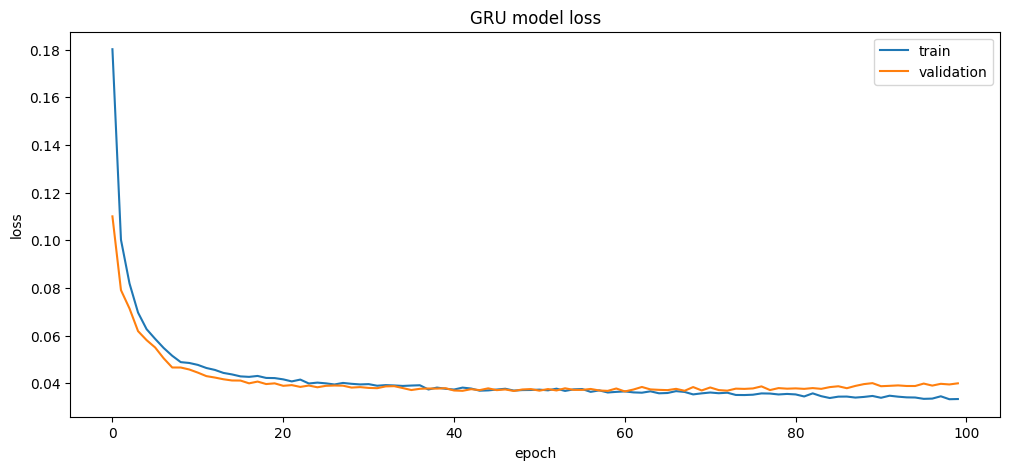

In [19]:
# history plotting
plt.plot(gru_history.history['loss'], label='train')
plt.plot(gru_history.history['val_loss'], label='validation')
plt.title('GRU model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend()
plt.show()

In [20]:
# inverse scaling

y_pred_GRU = gru_model.predict(X_test)
y_train_inv = GHI_scaler.inverse_transform(y_train.reshape(1, -1))
y_test_inv = GHI_scaler.inverse_transform(y_test.reshape(1, -1))
y_pred_GRU_inv = GHI_scaler.inverse_transform(y_pred_GRU)

31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step


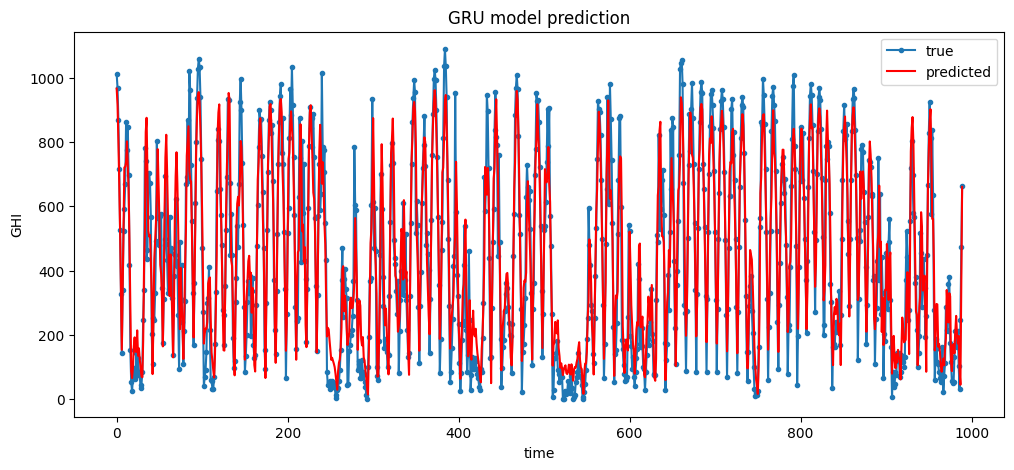

In [21]:
# visualizing predicition
plt.plot(y_test_inv.flatten(), marker='.', label='true')
plt.plot(y_pred_GRU_inv.flatten(), 'r', label='predicted')
plt.title('GRU model prediction')
plt.ylabel('GHI')
plt.xlabel('time')
plt.legend()
plt.show()

In [22]:
#evaluation metrics
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

In [23]:
def gru_accuracy_metrics(y_test_inv, y_pred_LSTM_inv):
    # Flatten the arrays
    y_test_flat = y_test_inv.flatten()
    y_pred_GRU_flat = y_pred_GRU_inv.flatten()

    # Compute the differences
    diff = y_test_flat - y_pred_GRU_flat

    # Compute metrics
    r2 = r2_score(y_test_flat, y_pred_GRU_flat)
    mae = mean_absolute_error(y_test_flat, y_pred_GRU_flat)
    mse = mean_squared_error(y_test_flat, y_pred_GRU_flat)
    rmse = np.sqrt(mse)
    mbe = np.mean(diff)
    rrmse = rmse / np.mean(y_test_flat)
    rmbe = mbe / np.mean(y_test_flat)

    # Print the grouped metrics
    print("\nGRU Accuracy Metrics")
    print("-------------------")
    print(f'R^2: {r2:.4f}')
    print(f'MAE: {mae:.4f}')
    print(f'MSE: {mse:.4f}')
    print(f'RMSE: {rmse:.4f}')
    print(f'MBE: {mbe:.4f}')
    print(f'RRMSE: {rrmse:.4f}')
    print(f'RMBE: {rmbe:.4f}')

# Call the function to compute and print GRU Accuracy Metrics
gru_accuracy_metrics(y_test_inv, y_pred_GRU_inv)


GRU Accuracy Metrics
-------------------
R^2: 0.8572
MAE: 87.2876
MSE: 12809.2289
RMSE: 113.1779
MBE: -9.3546
RRMSE: 0.2600
RMBE: -0.0215


# **LSTM**

In [24]:
# LSTM model building
lstm_model = tf.keras.Sequential()
lstm_model.add(tf.keras.layers.LSTM(units=100, input_shape=(X_train.shape[1], X_train.shape[2])))
lstm_model.add(tf.keras.layers.Dropout(rate=0.5))
lstm_model.add(tf.keras.layers.Dense(units=1))
lstm_model.compile(loss='mse', optimizer='adam')

In [25]:
lstm_history = lstm_model.fit(X_train, y_train,epochs=100,batch_size=64,validation_split=0.15,shuffle=False)

Epoch 1/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 0.2129 - val_loss: 0.1807
Epoch 2/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.1143 - val_loss: 0.0888
Epoch 3/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 0.0860 - val_loss: 0.0876
Epoch 4/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0690 - val_loss: 0.0668
Epoch 5/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0665 - val_loss: 0.0640
Epoch 6/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0562 - val_loss: 0.0554
Epoch 7/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0525 - val_loss: 0.0530
Epoch 8/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0500 - val_loss: 0.0508
Epoch 9/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0479 - val_loss: 0.0491
Epoch 10/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0464 - val_loss: 0.0477
Epoch 11/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0447 - val_loss: 0.0465
Epoch 12/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step

In [26]:
lstm_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 100)                 │          44,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             101 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 132,305 (516.82 KB)

 Trainable params: 44,101 (172.27 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 88,204 (344.55 KB)

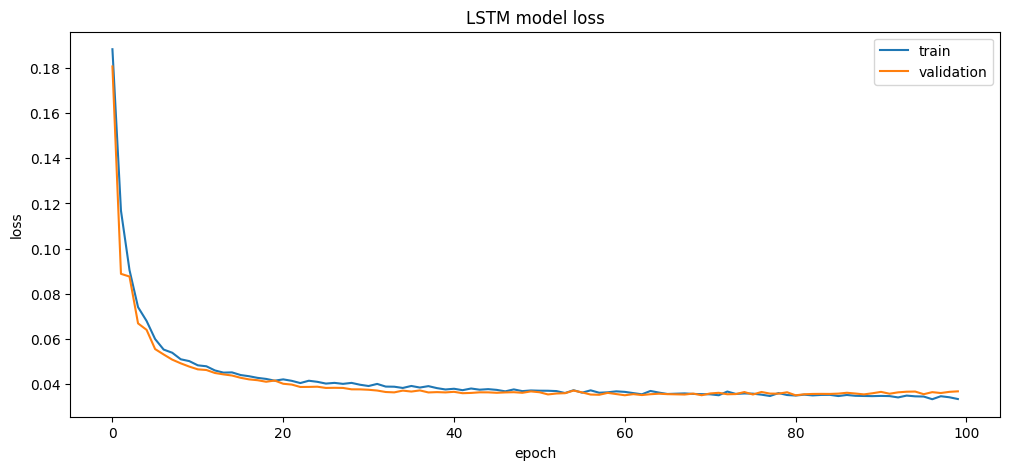

In [27]:
# model validation
plt.plot(lstm_history.history['loss'], label='train')
plt.plot(lstm_history.history['val_loss'], label='validation')
plt.title('LSTM model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend()
plt.show()

In [28]:
# inverse scaling

y_pred_LSTM = lstm_model.predict(X_test)
y_train_inv = GHI_scaler.inverse_transform(y_train.reshape(1, -1))
y_test_inv = GHI_scaler.inverse_transform(y_test.reshape(1, -1))
y_pred_LSTM_inv = GHI_scaler.inverse_transform(y_pred_LSTM)

31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step


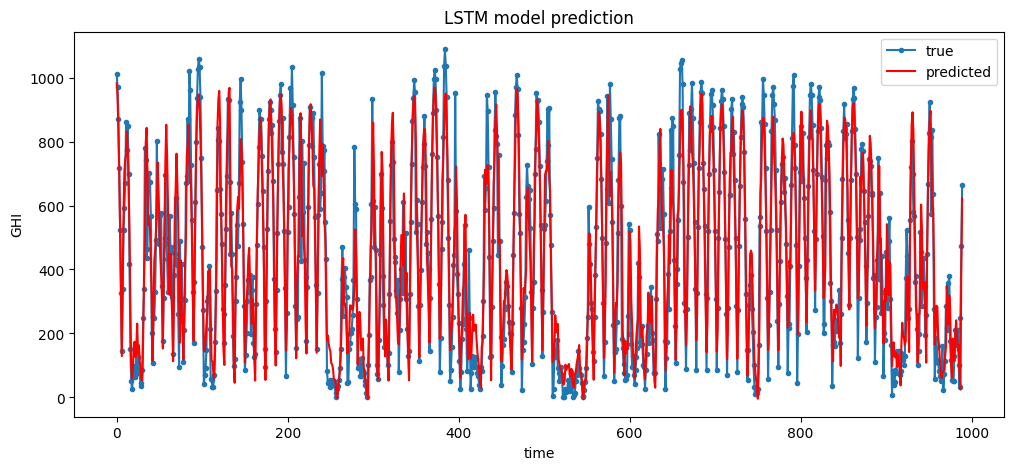

In [29]:
# visualize prediction
plt.plot(y_test_inv.flatten(), marker='.', label='true')
plt.plot(y_pred_LSTM_inv.flatten(), 'r', label='predicted')
plt.title('LSTM model prediction')
plt.ylabel('GHI')
plt.xlabel('time')
plt.legend()
plt.show()

In [30]:
def LSTM_accuracy_metrics(y_test_inv, y_pred_LSTM_inv):
    # Flatten the arrays
    y_test_flat = y_test_inv.flatten()
    y_pred_LSTM_flat = y_pred_LSTM_inv.flatten()

    # Compute the differences
    diff = y_test_flat - y_pred_LSTM_flat

    # Compute metrics
    r2 = r2_score(y_test_flat, y_pred_LSTM_flat)
    mae = mean_absolute_error(y_test_flat, y_pred_LSTM_flat)
    mse = mean_squared_error(y_test_flat, y_pred_LSTM_flat)
    rmse = np.sqrt(mse)
    mbe = np.mean(diff)
    rrmse = rmse / np.mean(y_test_flat)
    rmbe = mbe / np.mean(y_test_flat)

    # Print the grouped metrics
    print("\nLSTM Accuracy Metrics")
    print("-------------------")
    print(f'R^2: {r2:.4f}')
    print(f'MAE: {mae:.4f}')
    print(f'MSE: {mse:.4f}')
    print(f'RMSE: {rmse:.4f}')
    print(f'MBE: {mbe:.4f}')
    print(f'RRMSE: {rrmse:.4f}')
    print(f'RMBE: {rmbe:.4f}')

# Call the function to compute and print GRU Accuracy Metrics
LSTM_accuracy_metrics(y_test_inv, y_pred_LSTM_inv)


LSTM Accuracy Metrics
-------------------
R^2: 0.8635
MAE: 82.5940
MSE: 12247.7587
RMSE: 110.6696
MBE: -6.7339
RRMSE: 0.2542
RMBE: -0.0155


# **RNN**

In [31]:
# RNN model building
rnn_model = tf.keras.Sequential()
rnn_model.add(tf.keras.layers.SimpleRNN(units=100, activation='relu', input_shape=(time_steps, X_train.shape[2])))
rnn_model.add(tf.keras.layers.Dropout(rate=0.5))
rnn_model.add(tf.keras.layers.Dense(units=1))
rnn_model.compile(loss='mse', optimizer='adam')

In [32]:
# Train the model
rnn_history = rnn_model.fit(X_train, y_train, epochs=100, batch_size=64, validation_split=0.15, shuffle=False)

Epoch 1/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.4266 - val_loss: 0.1304
Epoch 2/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1677 - val_loss: 0.0708
Epoch 3/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1265 - val_loss: 0.0620
Epoch 4/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1019 - val_loss: 0.0534
Epoch 5/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0845 - val_loss: 0.0501
Epoch 6/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0755 - val_loss: 0.0439
Epoch 7/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0724 - val_loss: 0.0432
Epoch 8/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0662 - val_loss: 0.0413
Epoch 9/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0633 - val_loss: 0.0410
Epoch 10/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0616 - val_loss: 0.0435
Epoch 11/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0566 - val_loss: 0.0411
Epoch 12/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0

In [33]:
# Model summary
rnn_model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)               │ (None, 100)                 │          11,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │             101 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 33,305 (130.10 KB)

 Trainable params: 11,101 (43.36 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 22,204 (86.74 KB)

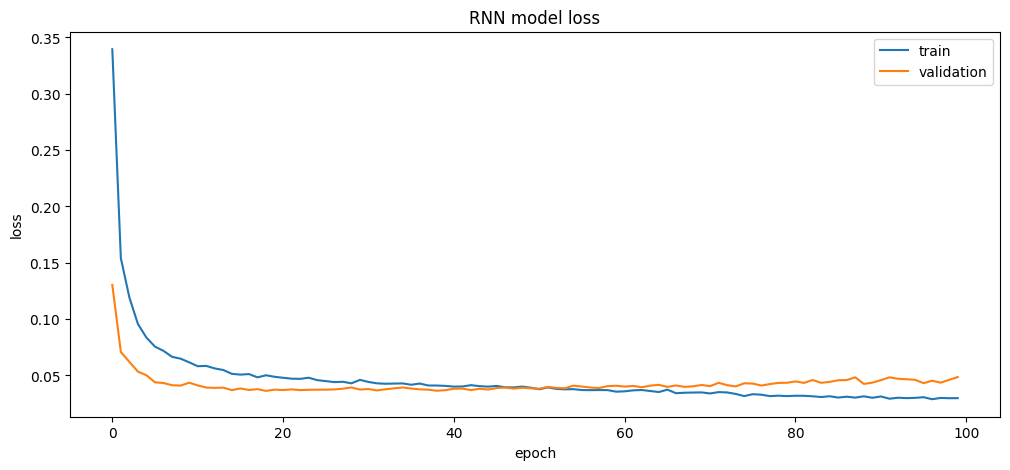

In [34]:
# model validation
plt.plot(rnn_history.history['loss'], label='train')
plt.plot(rnn_history.history['val_loss'], label='validation')
plt.title('RNN model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend()
plt.show()

In [35]:
# Inverse scaling
y_pred_RNN = rnn_model.predict(X_test)
y_train_inv = GHI_scaler.inverse_transform(y_train.reshape(1, -1))
y_test_inv = GHI_scaler.inverse_transform(y_test.reshape(1, -1))
y_pred_RNN_inv = GHI_scaler.inverse_transform(y_pred_RNN)

31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


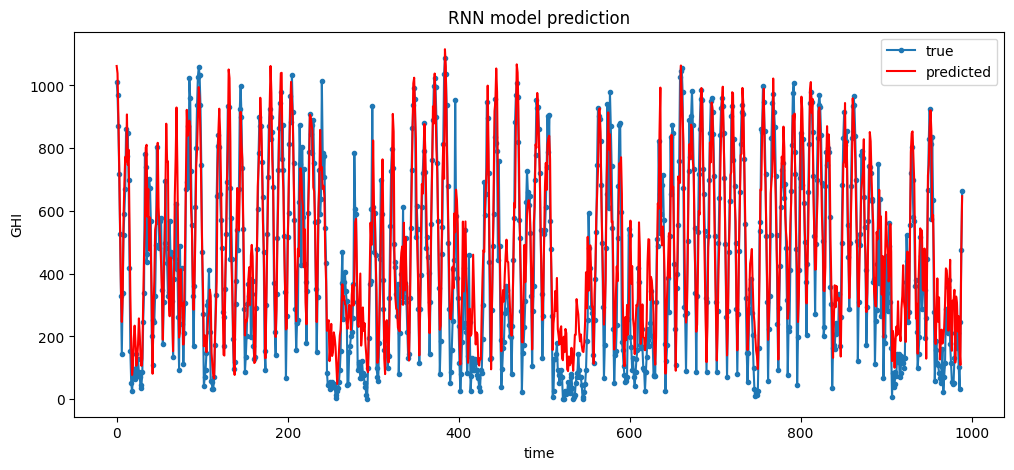

In [36]:
# visualize prediction
plt.plot(y_test_inv.flatten(), marker='.', label='true')
plt.plot(y_pred_RNN_inv.flatten(), 'r', label='predicted')
plt.title('RNN model prediction')
plt.ylabel('GHI')
plt.xlabel('time')
plt.legend()
plt.show()

In [37]:
def RNN_accuracy_metrics(y_test_inv, y_pred_RNN_inv):
    # Flatten the arrays
    y_test_flat = y_test_inv.flatten()
    y_pred_RNN_flat = y_pred_RNN_inv.flatten()

    # Compute the differences
    diff = y_test_flat - y_pred_RNN_flat

    # Compute metrics
    r2 = r2_score(y_test_flat, y_pred_RNN_flat)
    mae = mean_absolute_error(y_test_flat, y_pred_RNN_flat)
    mse = mean_squared_error(y_test_flat, y_pred_RNN_flat)
    rmse = np.sqrt(mse)
    mbe = np.mean(diff)
    rrmse = rmse / np.mean(y_test_flat)
    rmbe = mbe / np.mean(y_test_flat)

    # Print the grouped metrics
    print("\nRNN Accuracy Metrics")
    print("-------------------")
    print(f'R^2: {r2:.4f}')
    print(f'MAE: {mae:.4f}')
    print(f'MSE: {mse:.4f}')
    print(f'RMSE: {rmse:.4f}')
    print(f'MBE: {mbe:.4f}')
    print(f'RRMSE: {rrmse:.4f}')
    print(f'RMBE: {rmbe:.4f}')

# Call the function to compute and print RNN Accuracy Metrics
RNN_accuracy_metrics(y_test_inv, y_pred_RNN_inv)



RNN Accuracy Metrics
-------------------
R^2: 0.7893
MAE: 110.1640
MSE: 18906.0068
RMSE: 137.4991
MBE: -44.9053
RRMSE: 0.3159
RMBE: -0.1032


# **ANN**

In [38]:
import numpy as np
import tensorflow as tf

# Create a separate copy of the dataset for ANN
ann_train = train.copy()
ann_test = test.copy()

# Function to flatten and reshape the data for ANN input
def create_ann_dataset(X, y, time_steps=1):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        v = X.iloc[i:(i + time_steps)].values
        Xs.append(v.flatten())  # Flatten the input for ANN
        ys.append(y.iloc[i + time_steps])
    return np.array(Xs), np.array(ys)

time_steps = 7

# Use the copied datasets to flatten and reshape for ANN
X_ANN_train, y_ANN_train = create_ann_dataset(ann_train, ann_train['GHI_Average'], time_steps)
X_ANN_test, y_ANN_test = create_ann_dataset(ann_test, ann_test['GHI_Average'], time_steps)

print("X_ANN_train shape:", X_ANN_train.shape)
print("y_ANN_train shape:", y_ANN_train.shape)
print("X_ANN_test shape:", X_ANN_test.shape)
print("y_ANN_test shape:", y_ANN_test.shape)

X_ANN_train shape: (4645, 63)
y_ANN_train shape: (4645,)
X_ANN_test shape: (990, 63)
y_ANN_test shape: (990,)


In [39]:
# ANN model design
ann_model = tf.keras.Sequential()
ann_model.add(tf.keras.layers.Dense(units=100, activation='relu', input_shape=(X_ANN_train.shape[1],)))  # Flattened input
ann_model.add(tf.keras.layers.Dropout(rate=0.5))
ann_model.add(tf.keras.layers.Dense(units=1))
ann_model.compile(loss='mean_squared_error', optimizer='adam')
ann_model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 100)                 │           6,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │             101 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,501 (25.39 KB)

 Trainable params: 6,501 (25.39 KB)

 Non-trainable params: 0 (0.00 B)

In [40]:
# Train the model
ann_history = ann_model.fit(X_ANN_train, y_ANN_train, epochs=100, batch_size=64, validation_split=0.15, shuffle=False)

Epoch 1/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.8495 - val_loss: 0.1194
Epoch 2/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4385 - val_loss: 0.0860
Epoch 3/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2834 - val_loss: 0.0711
Epoch 4/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1994 - val_loss: 0.0668
Epoch 5/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1400 - val_loss: 0.0620
Epoch 6/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1151 - val_loss: 0.0569
Epoch 7/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0955 - val_loss: 0.0563
Epoch 8/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0898 - val_loss: 0.0537
Epoch 9/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0808 - val_loss: 0.0591
Epoch 10/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0760 - val_loss: 0.0531
Epoch 11/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0691 - val_loss: 0.0532
Epoch 12/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0

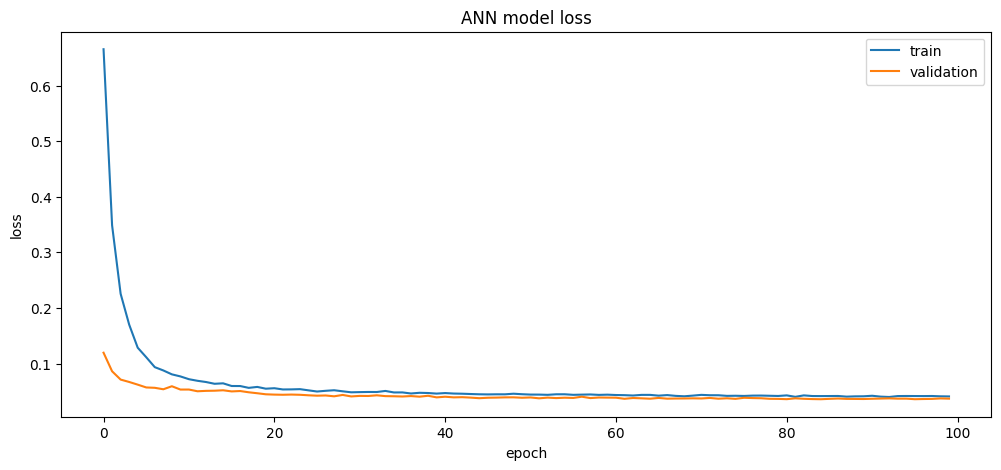

In [41]:
# model validation
plt.plot(ann_history.history['loss'], label='train')
plt.plot(ann_history.history['val_loss'], label='validation')
plt.title('ANN model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend()
plt.show()

In [42]:
# Inverse scaling for the predicted values
y_pred_ANN = ann_model.predict(X_ANN_test)
y_pred_ANN_reshaped = y_pred_ANN.reshape(-1, 1)

y_ANN_train_inv = GHI_scaler.inverse_transform(y_ANN_train.reshape(-1, 1))
y_ANN_test_inv = GHI_scaler.inverse_transform(y_ANN_test.reshape(-1, 1))
y_pred_ANN_inv = GHI_scaler.inverse_transform(y_pred_ANN_reshaped)


31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


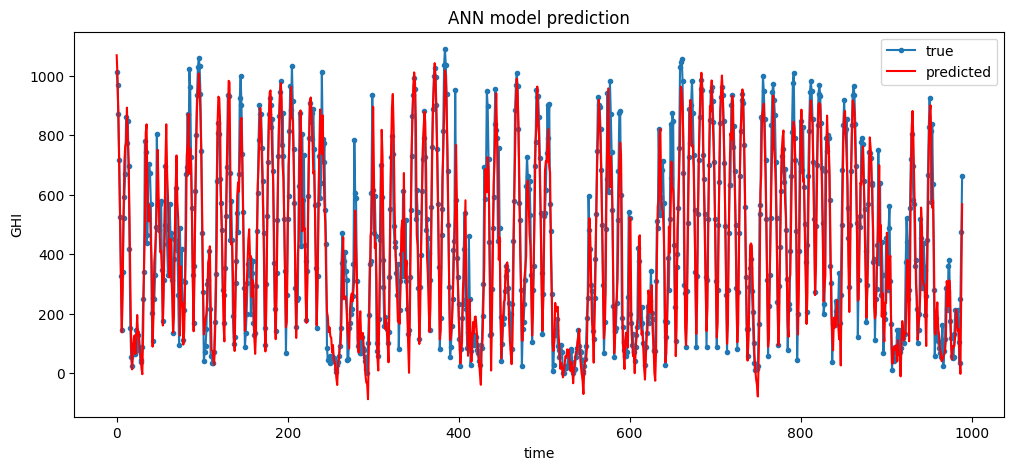

In [43]:
# Visualize prediction
plt.plot(y_ANN_test_inv.flatten(), marker='.', label='true')
plt.plot(y_pred_ANN_inv.flatten(), 'r', label='predicted')
plt.title('ANN model prediction')
plt.ylabel('GHI')
plt.xlabel('time')
plt.legend()
plt.show()


In [44]:
def ANN_accuracy_metrics(y_ANN_test_inv, y_pred_ANN_inv):
    # Flatten the arrays
    y_ANN_test_flat = y_ANN_test_inv.flatten()
    y_pred_ANN_flat = y_pred_ANN_inv.flatten()

    # Compute the differences
    diff = y_ANN_test_flat - y_pred_ANN_flat

    # Compute metrics
    r2 = r2_score(y_ANN_test_flat, y_pred_ANN_flat)
    mae = mean_absolute_error(y_ANN_test_flat, y_pred_ANN_flat)
    mse = mean_squared_error(y_ANN_test_flat, y_pred_ANN_flat)
    rmse = np.sqrt(mse)
    mbe = np.mean(diff)
    rrmse = rmse / np.mean(y_ANN_test_flat)
    rmbe = mbe / np.mean(y_ANN_test_flat)

    # Print the grouped metrics
    print("\nANN Accuracy Metrics")
    print("-------------------")
    print(f'R^2: {r2:.4f}')
    print(f'MAE: {mae:.4f}')
    print(f'MSE: {mse:.4f}')
    print(f'RMSE: {rmse:.4f}')
    print(f'MBE: {mbe:.4f}')
    print(f'RRMSE: {rrmse:.4f}')
    print(f'RMBE: {rmbe:.4f}')

# Call the function to compute and print ANN Accuracy Metrics
ANN_accuracy_metrics(y_ANN_test_inv, y_pred_ANN_inv)



ANN Accuracy Metrics
-------------------
R^2: 0.8584
MAE: 82.1241
MSE: 12709.1721
RMSE: 112.7350
MBE: 17.9392
RRMSE: 0.2590
RMBE: 0.0412


# **CNN**

In [50]:
# CNN model building
cnn_model = tf.keras.Sequential()

# Add a Conv1D layer (filters = 64, kernel_size = 3, activation = relu)
cnn_model.add(tf.keras.layers.Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))

# Add a MaxPooling1D layer to downsample the input
cnn_model.add(tf.keras.layers.MaxPooling1D(pool_size=2))

# Add a Dropout layer to prevent overfitting
cnn_model.add(tf.keras.layers.Dropout(rate=0.5))

# Add a Flatten layer to reshape the output for Dense layers
cnn_model.add(tf.keras.layers.Flatten())

# Add a Dense layer for the output
cnn_model.add(tf.keras.layers.Dense(units=1))

# Compile the CNN model
cnn_model.compile(loss='mse', optimizer='adam')

In [51]:
# Train the CNN model
cnn_history = cnn_model.fit(X_train, y_train, epochs=100, batch_size=64, validation_split=0.15, shuffle=False)

Epoch 1/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.4552 - val_loss: 0.2351
Epoch 2/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2463 - val_loss: 0.1895
Epoch 3/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1963 - val_loss: 0.1731
Epoch 4/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1615 - val_loss: 0.1574
Epoch 5/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1484 - val_loss: 0.1536
Epoch 6/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1373 - val_loss: 0.1398
Epoch 7/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1298 - val_loss: 0.1472
Epoch 8/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1148 - val_loss: 0.1389
Epoch 9/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1182 - val_loss: 0.1324
Epoch 10/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1131 - val_loss: 0.1319
Epoch 11/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1077 - val_loss: 0.1246
Epoch 12/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1

In [52]:
# Model summary
cnn_model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                      │ (None, 5, 64)               │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d (MaxPooling1D)         │ (None, 2, 64)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 2, 64)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,765 (22.52 KB)

 Trainable params: 1,921 (7.50 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 3,844 (15.02 KB)

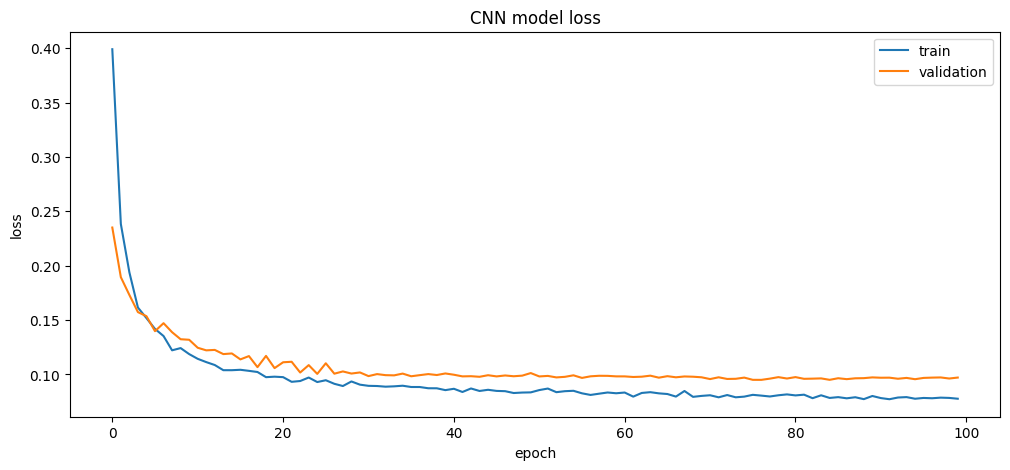

In [53]:
# Model validation (loss plot)
plt.plot(cnn_history.history['loss'], label='train')
plt.plot(cnn_history.history['val_loss'], label='validation')
plt.title('CNN model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend()
plt.show()

In [54]:
# Predict using the trained CNN model
y_pred_CNN = cnn_model.predict(X_test)

31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


In [55]:
# Inverse scaling
y_train_inv = GHI_scaler.inverse_transform(y_train.reshape(1, -1))
y_test_inv = GHI_scaler.inverse_transform(y_test.reshape(1, -1))
y_pred_CNN_inv = GHI_scaler.inverse_transform(y_pred_CNN)

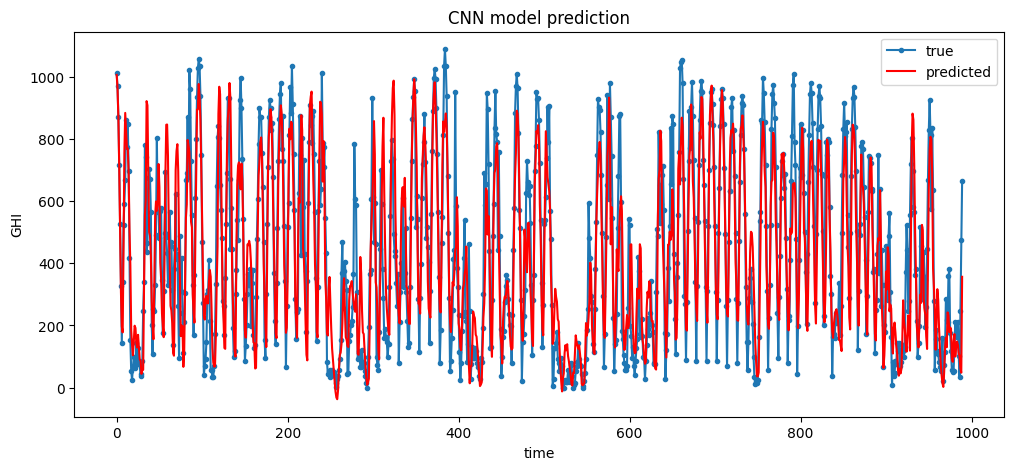

In [56]:
# Visualize the prediction
plt.plot(y_test_inv.flatten(), marker='.', label='true')
plt.plot(y_pred_CNN_inv.flatten(), 'r', label='predicted')
plt.title('CNN model prediction')
plt.ylabel('GHI')
plt.xlabel('time')
plt.legend()
plt.show()

In [57]:
def CNN_accuracy_metrics(y_test_inv, y_pred_CNN_inv):
    # Flatten the arrays
    y_test_flat = y_test_inv.flatten()
    y_pred_CNN_flat = y_pred_CNN_inv.flatten()

    # Compute the differences
    diff = y_test_flat - y_pred_CNN_flat

    # Compute metrics
    r2 = r2_score(y_test_flat, y_pred_CNN_flat)
    mae = mean_absolute_error(y_test_flat, y_pred_CNN_flat)
    mse = mean_squared_error(y_test_flat, y_pred_CNN_flat)
    rmse = np.sqrt(mse)
    mbe = np.mean(diff)
    rrmse = rmse / np.mean(y_test_flat)
    rmbe = mbe / np.mean(y_test_flat)

    # Print the grouped metrics
    print("\nCNN Accuracy Metrics")
    print("-------------------")
    print(f'R^2: {r2:.4f}')
    print(f'MAE: {mae:.4f}')
    print(f'MSE: {mse:.4f}')
    print(f'RMSE: {rmse:.4f}')
    print(f'MBE: {mbe:.4f}')
    print(f'RRMSE: {rrmse:.4f}')
    print(f'RMBE: {rmbe:.4f}')

# Call the function to compute and print CNN Accuracy Metrics
CNN_accuracy_metrics(y_test_inv, y_pred_CNN_inv)



CNN Accuracy Metrics
-------------------
R^2: 0.7382
MAE: 117.2748
MSE: 23494.1261
RMSE: 153.2779
MBE: 17.4592
RRMSE: 0.3521
RMBE: 0.0401


# **MLP**

In [70]:
import numpy as np

# Flatten the input data for MLP
X_train_flat = X_train.reshape(X_train.shape[0], -1).copy()  # Flatten and make a copy
X_test_flat = X_test.reshape(X_test.shape[0], -1).copy()    # Flatten and make a copy

In [71]:
# MLP model building
mlp_model = tf.keras.Sequential()
mlp_model.add(tf.keras.layers.Dense(units=100, activation='relu', input_shape=(X_train_flat.shape[1],)))  # Change input shape to (63,)
mlp_model.add(tf.keras.layers.Dropout(rate=0.5))
mlp_model.add(tf.keras.layers.Dense(units=1))  # Output layer
mlp_model.compile(loss='mse', optimizer='adam')


In [72]:
# Train the model
mlp_history = mlp_model.fit(X_train_flat, y_train, epochs=100, batch_size=64, validation_split=0.15, shuffle=False)

Epoch 1/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.6369 - val_loss: 0.1237
Epoch 2/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3417 - val_loss: 0.0897
Epoch 3/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2228 - val_loss: 0.0969
Epoch 4/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1595 - val_loss: 0.0785
Epoch 5/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1209 - val_loss: 0.0871
Epoch 6/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1051 - val_loss: 0.0828
Epoch 7/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0949 - val_loss: 0.0733
Epoch 8/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0821 - val_loss: 0.0629
Epoch 9/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0813 - val_loss: 0.0599
Epoch 10/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0700 - val_loss: 0.0522
Epoch 11/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0652 - val_loss: 0.0513
Epoch 12/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.

In [73]:
# Model summary
mlp_model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                      │ (None, 100)                 │           6,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │             101 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 19,505 (76.20 KB)

 Trainable params: 6,501 (25.39 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 13,004 (50.80 KB)

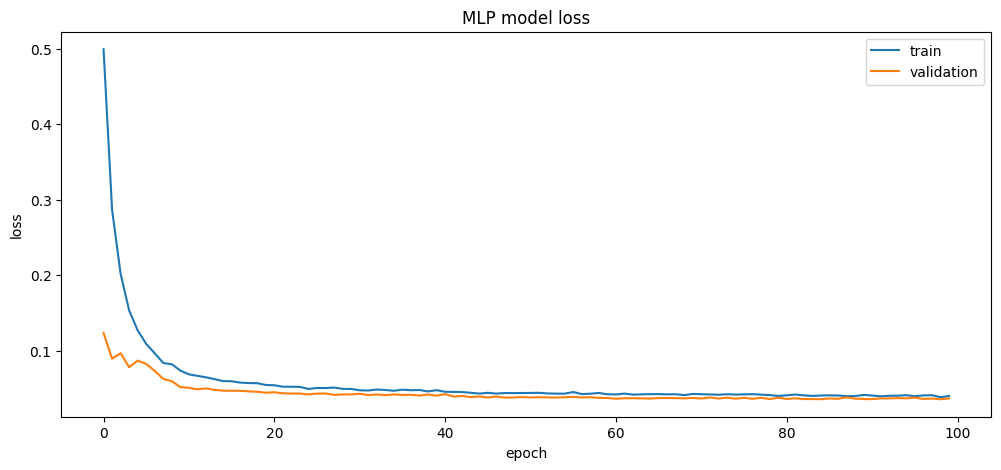

In [74]:
# Model validation
plt.plot(mlp_history.history['loss'], label='train')
plt.plot(mlp_history.history['val_loss'], label='validation')
plt.title('MLP model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend()
plt.show()

In [75]:
# Make predictions with the flattened test data
y_pred_MLP = mlp_model.predict(X_test_flat)

31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


In [76]:
# Inverse scaling for MLP predictions
y_train_inv = GHI_scaler.inverse_transform(y_train.reshape(1, -1))
y_test_inv = GHI_scaler.inverse_transform(y_test.reshape(1, -1))
y_pred_MLP_inv = GHI_scaler.inverse_transform(y_pred_MLP)

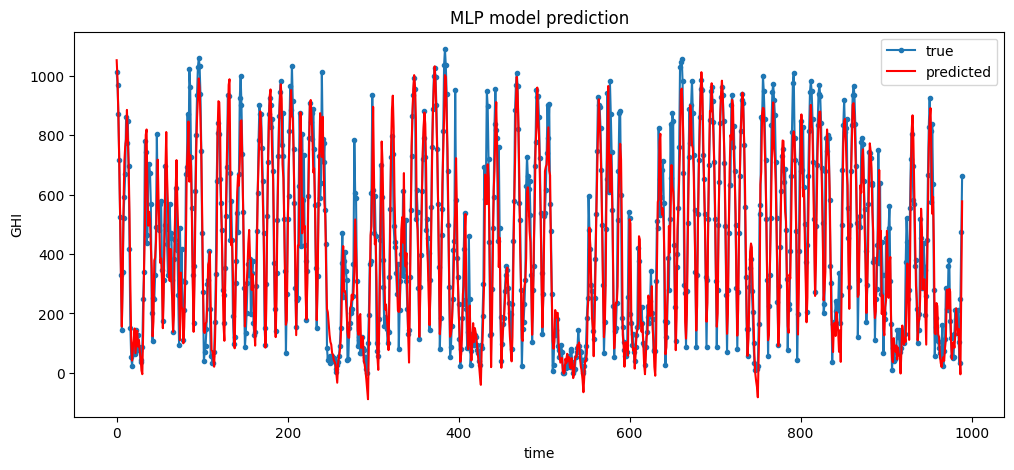

In [77]:
# Visualize prediction
plt.plot(y_test_inv.flatten(), marker='.', label='true')
plt.plot(y_pred_MLP_inv.flatten(), 'r', label='predicted')
plt.title('MLP model prediction')
plt.ylabel('GHI')
plt.xlabel('time')
plt.legend()
plt.show()

In [78]:
def MLP_accuracy_metrics(y_test_inv, y_pred_MLP_inv):
    # Flatten the arrays
    y_test_flat = y_test_inv.flatten()
    y_pred_MLP_flat = y_pred_MLP_inv.flatten()

    # Compute the differences
    diff = y_test_flat - y_pred_MLP_flat

    # Compute metrics
    r2 = r2_score(y_test_flat, y_pred_MLP_flat)
    mae = mean_absolute_error(y_test_flat, y_pred_MLP_flat)
    mse = mean_squared_error(y_test_flat, y_pred_MLP_flat)
    rmse = np.sqrt(mse)
    mbe = np.mean(diff)
    rrmse = rmse / np.mean(y_test_flat)
    rmbe = mbe / np.mean(y_test_flat)

    # Print the grouped metrics
    print("\nMLP Accuracy Metrics")
    print("-------------------")
    print(f'R^2: {r2:.4f}')
    print(f'MAE: {mae:.4f}')
    print(f'MSE: {mse:.4f}')
    print(f'RMSE: {rmse:.4f}')
    print(f'MBE: {mbe:.4f}')
    print(f'RRMSE: {rrmse:.4f}')
    print(f'RMBE: {rmbe:.4f}')

# Call the function to compute and print MLP Accuracy Metrics
MLP_accuracy_metrics(y_test_inv, y_pred_MLP_inv)


MLP Accuracy Metrics
-------------------
R^2: 0.8598
MAE: 81.2009
MSE: 12578.5445
RMSE: 112.1541
MBE: 19.4560
RRMSE: 0.2576
RMBE: 0.0447


# **SVR**

In [97]:
from sklearn.svm import SVR
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

In [98]:
# Flatten X_train and X_test to be 2D arrays for SVR
X_train_flat = X_train.reshape(X_train.shape[0], -1).copy()
X_test_flat = X_test.reshape(X_test.shape[0], -1).copy()

In [99]:
# Initialize the SVR model
svr_model = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=0.1)

In [100]:
# Train the SVR model
svr_model.fit(X_train_flat, y_train)

SVR(C=100, gamma=0.1)

In [101]:
# Predict using the SVR model
y_pred_SVR = svr_model.predict(X_test_flat)

In [102]:
# Inverse scaling of predictions
y_train_inv = GHI_scaler.inverse_transform(y_train.reshape(-1, 1))
y_test_inv = GHI_scaler.inverse_transform(y_test.reshape(-1, 1))
y_pred_SVR_inv = GHI_scaler.inverse_transform(y_pred_SVR.reshape(-1, 1))

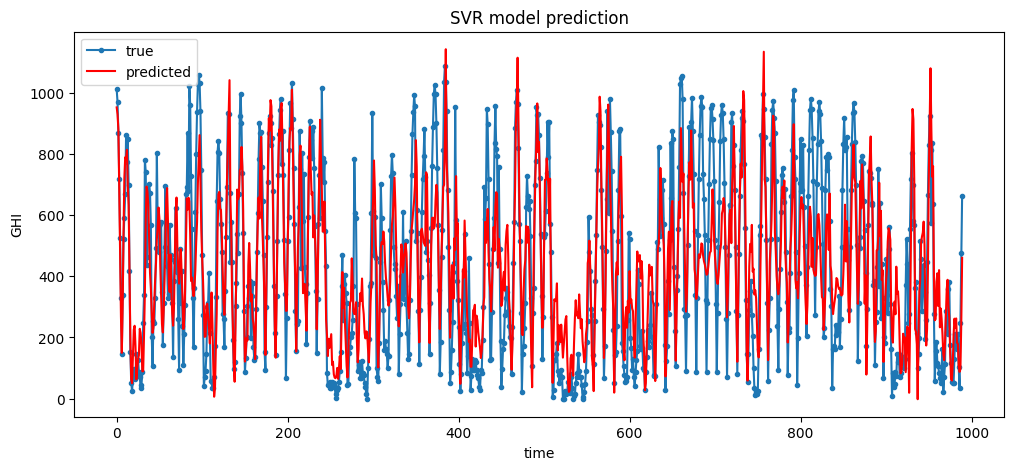

In [103]:
# Visualize the prediction
plt.plot(y_test_inv.flatten(), marker='.', label='true')
plt.plot(y_pred_SVR_inv.flatten(), 'r', label='predicted')
plt.title('SVR model prediction')
plt.ylabel('GHI')
plt.xlabel('time')
plt.legend()
plt.show()

In [104]:
def SVR_accuracy_metrics(y_test_inv, y_pred_SVR_inv):
    # Flatten the arrays
    y_test_flat = y_test_inv.flatten()
    y_pred_SVR_flat = y_pred_SVR_inv.flatten()

    # Compute the differences
    diff = y_test_flat - y_pred_SVR_flat

    # Compute metrics
    r2 = r2_score(y_test_flat, y_pred_SVR_flat)
    mae = mean_absolute_error(y_test_flat, y_pred_SVR_flat)
    mse = mean_squared_error(y_test_flat, y_pred_SVR_flat)
    rmse = np.sqrt(mse)
    mbe = np.mean(diff)
    rrmse = rmse / np.mean(y_test_flat)
    rmbe = mbe / np.mean(y_test_flat)

    # Print the grouped metrics
    print("\nSVR Accuracy Metrics")
    print("-------------------")
    print(f'R^2: {r2:.4f}')
    print(f'MAE: {mae:.4f}')
    print(f'MSE: {mse:.4f}')
    print(f'RMSE: {rmse:.4f}')
    print(f'MBE: {mbe:.4f}')
    print(f'RRMSE: {rrmse:.4f}')
    print(f'RMBE: {rmbe:.4f}')

# Call the function to compute and print SVR Accuracy Metrics
SVR_accuracy_metrics(y_test_inv, y_pred_SVR_inv)



SVR Accuracy Metrics
-------------------
R^2: 0.6669
MAE: 137.9892
MSE: 29891.0388
RMSE: 172.8903
MBE: 0.9770
RRMSE: 0.3972
RMBE: 0.0022


# **DNN**

In [113]:
# Flatten X_train and X_test to be 2D arrays for DNN
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)

In [114]:
# DNN model building
dnn_model = tf.keras.Sequential()
dnn_model.add(tf.keras.layers.Dense(units=100, activation='relu', input_shape=(X_train_flat.shape[1],)))
dnn_model.add(tf.keras.layers.Dropout(rate=0.5))
dnn_model.add(tf.keras.layers.Dense(units=1))  # Output layer
dnn_model.compile(loss='mse', optimizer='adam')

In [115]:
# Train the DNN model
dnn_history = dnn_model.fit(X_train_flat, y_train, epochs=100, batch_size=64, validation_split=0.15, shuffle=False)

Epoch 1/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.8278 - val_loss: 0.1185
Epoch 2/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.4146 - val_loss: 0.1070
Epoch 3/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3059 - val_loss: 0.0754
Epoch 4/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1947 - val_loss: 0.0815
Epoch 5/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1603 - val_loss: 0.0840
Epoch 6/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1197 - val_loss: 0.0870
Epoch 7/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0996 - val_loss: 0.0795
Epoch 8/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1020 - val_loss: 0.0743
Epoch 9/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0839 - val_loss: 0.0629
Epoch 10/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0756 - val_loss: 0.0570
Epoch 11/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0728 - val_loss: 0.0496
Epoch 12/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0

In [116]:
# Model summary
dnn_model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                      │ (None, 100)                 │           6,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 1)                   │             101 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 19,505 (76.20 KB)

 Trainable params: 6,501 (25.39 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 13,004 (50.80 KB)

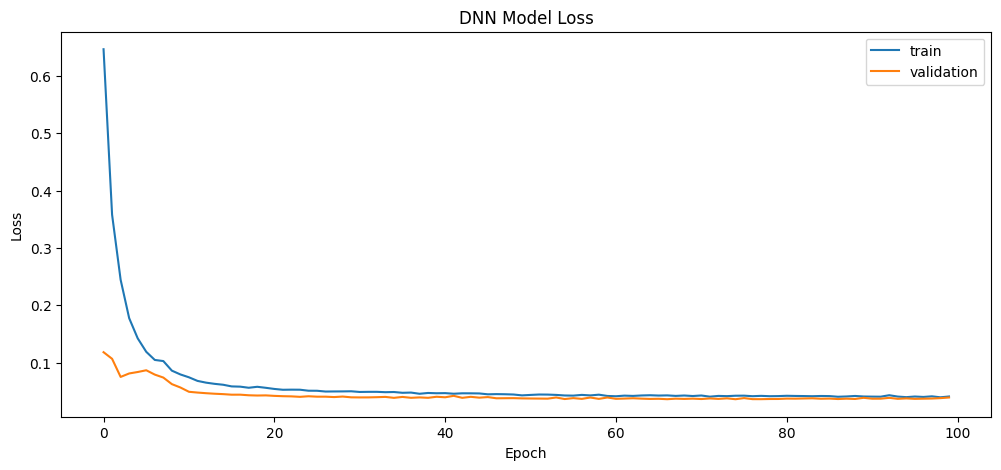

In [117]:
# Plot model loss
plt.plot(dnn_history.history['loss'], label='train')
plt.plot(dnn_history.history['val_loss'], label='validation')
plt.title('DNN Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [118]:
# Inverse scaling
y_pred_DNN = dnn_model.predict(X_test_flat)
y_train_inv = GHI_scaler.inverse_transform(y_train.reshape(1, -1))
y_test_inv = GHI_scaler.inverse_transform(y_test.reshape(1, -1))
y_pred_DNN_inv = GHI_scaler.inverse_transform(y_pred_DNN)

31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


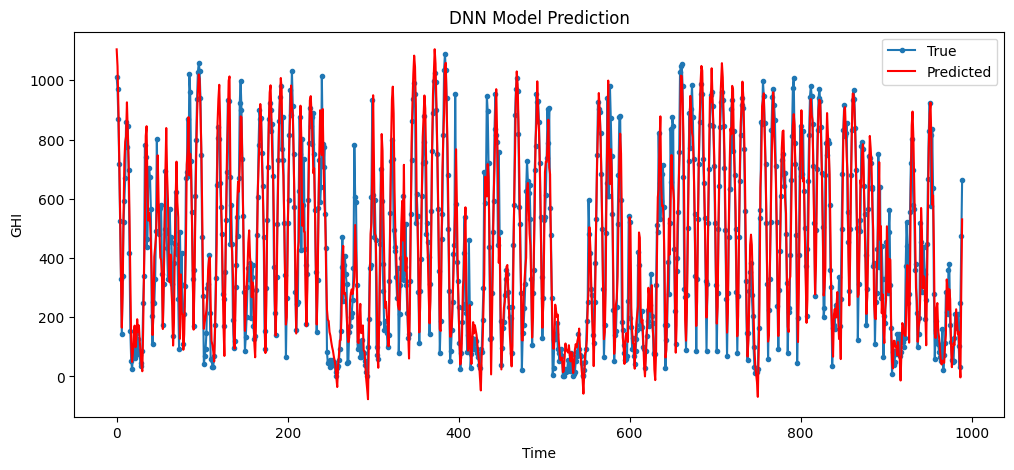

In [119]:
# Visualize prediction
plt.plot(y_test_inv.flatten(), marker='.', label='True')
plt.plot(y_pred_DNN_inv.flatten(), 'r', label='Predicted')
plt.title('DNN Model Prediction')
plt.ylabel('GHI')
plt.xlabel('Time')
plt.legend()
plt.show()

In [120]:
def DNN_accuracy_metrics(y_test_inv, y_pred_DNN_inv):
    # Flatten the arrays
    y_test_flat = y_test_inv.flatten()
    y_pred_DNN_flat = y_pred_DNN_inv.flatten()

    # Compute the differences
    diff = y_test_flat - y_pred_DNN_flat

    # Compute metrics
    r2 = r2_score(y_test_flat, y_pred_DNN_flat)
    mae = mean_absolute_error(y_test_flat, y_pred_DNN_flat)
    mse = mean_squared_error(y_test_flat, y_pred_DNN_flat)
    rmse = np.sqrt(mse)
    mbe = np.mean(diff)
    rrmse = rmse / np.mean(y_test_flat)
    rmbe = mbe / np.mean(y_test_flat)

    # Print the grouped metrics
    print("\nDNN Accuracy Metrics")
    print("--------------------")
    print(f'R^2: {r2:.4f}')
    print(f'MAE: {mae:.4f}')
    print(f'MSE: {mse:.4f}')
    print(f'RMSE: {rmse:.4f}')
    print(f'MBE: {mbe:.4f}')
    print(f'RRMSE: {rrmse:.4f}')
    print(f'RMBE: {rmbe:.4f}')

# Call the function to compute and print DNN Accuracy Metrics
DNN_accuracy_metrics(y_test_inv, y_pred_DNN_inv)



DNN Accuracy Metrics
--------------------
R^2: 0.8566
MAE: 82.8319
MSE: 12866.1713
RMSE: 113.4291
MBE: -5.1916
RRMSE: 0.2606
RMBE: -0.0119


# **MODEL COMPARISON**

In [121]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def compute_metrics(y_true, y_pred):
    # Flatten the arrays
    y_true_flat = y_true.flatten()
    y_pred_flat = y_pred.flatten()

    # Compute the differences
    diff = y_true_flat - y_pred_flat

    # Compute metrics
    r2 = r2_score(y_true_flat, y_pred_flat)
    mae = mean_absolute_error(y_true_flat, y_pred_flat)
    mse = mean_squared_error(y_true_flat, y_pred_flat)
    rmse = np.sqrt(mse)
    mbe = np.mean(diff)

    return rmse, mae, mbe

def GRU_accuracy_metrics(y_test_inv, y_pred_GRU_inv):
    return compute_metrics(y_test_inv, y_pred_GRU_inv)

def LSTM_accuracy_metrics(y_test_inv, y_pred_LSTM_inv):
    return compute_metrics(y_test_inv, y_pred_LSTM_inv)

def RNN_accuracy_metrics(y_test_inv, y_pred_RNN_inv):
    return compute_metrics(y_test_inv, y_pred_RNN_inv)

def ANN_accuracy_metrics(y_ANN_test_inv, y_pred_ANN_inv):
    return compute_metrics(y_ANN_test_inv, y_pred_ANN_inv)

def CNN_accuracy_metrics(y_test_inv, y_pred_CNN_inv):
    return compute_metrics(y_test_inv, y_pred_CNN_inv)

def MLP_accuracy_metrics(y_test_inv, y_pred_MLP_inv):
    return compute_metrics(y_test_inv, y_pred_MLP_inv)

def SVR_accuracy_metrics(y_test_inv, y_pred_SVR_inv):
    return compute_metrics(y_test_inv, y_pred_SVR_inv)

def DNN_accuracy_metrics(y_test_inv, y_pred_DNN_inv):
    return compute_metrics(y_test_inv, y_pred_DNN_inv)

In [122]:
# Compute metrics for each model
rmse_GRU, mae_GRU, mbe_GRU = GRU_accuracy_metrics(y_test_inv, y_pred_GRU_inv)
rmse_LSTM, mae_LSTM, mbe_LSTM = LSTM_accuracy_metrics(y_test_inv, y_pred_LSTM_inv)
rmse_RNN, mae_RNN, mbe_RNN = RNN_accuracy_metrics(y_test_inv, y_pred_RNN_inv)
rmse_ANN, mae_ANN, mbe_ANN = ANN_accuracy_metrics(y_test_inv, y_pred_ANN_inv)
rmse_CNN, mae_CNN, mbe_CNN = CNN_accuracy_metrics(y_test_inv, y_pred_CNN_inv)
rmse_MLP, mae_MLP, mbe_MLP = MLP_accuracy_metrics(y_test_inv, y_pred_MLP_inv)
rmse_SVR, mae_SVR, mbe_SVR = SVR_accuracy_metrics(y_test_inv, y_pred_SVR_inv)
rmse_DNN, mae_DNN, mbe_DNN = DNN_accuracy_metrics(y_test_inv, y_pred_DNN_inv)

# Print or store the metrics as needed
print(f"GRU - RMSE: {rmse_GRU}, MAE: {mae_GRU}, MBE: {mbe_GRU}")
print(f"LSTM - RMSE: {rmse_LSTM}, MAE: {mae_LSTM}, MBE: {mbe_LSTM}")
print(f"RNN - RMSE: {rmse_RNN}, MAE: {mae_RNN}, MBE: {mbe_RNN}")
print(f"ANN - RMSE: {rmse_ANN}, MAE: {mae_ANN}, MBE: {mbe_ANN}")
print(f"CNN - RMSE: {rmse_CNN}, MAE: {mae_CNN}, MBE: {mbe_CNN}")
print(f"MLP - RMSE: {rmse_MLP}, MAE: {mae_MLP}, MBE: {mbe_MLP}")
print(f"SVR - RMSE: {rmse_SVR}, MAE: {mae_SVR}, MBE: {mbe_SVR}")
print(f"DNN - RMSE: {rmse_DNN}, MAE: {mae_DNN}, MBE: {mbe_DNN}")

GRU - RMSE: 113.17786410880929, MAE: 87.28763156989851, MBE: -9.354638589017132
LSTM - RMSE: 110.66959232085722, MAE: 82.59401098843018, MBE: -6.73386531669545
RNN - RMSE: 137.4991158040954, MAE: 110.16395150811591, MBE: -44.90526410014803
ANN - RMSE: 112.7349640180385, MAE: 82.12408135202732, MBE: 17.939219951567814
CNN - RMSE: 153.27793743585582, MAE: 117.27479427637796, MBE: 17.45917925908247
MLP - RMSE: 112.15411055042323, MAE: 81.20090365207241, MBE: 19.45598048665446
SVR - RMSE: 172.89025071227502, MAE: 137.9892459964815, MBE: 0.9769756907956848
DNN - RMSE: 113.42914665792192, MAE: 82.83194938976602, MBE: -5.191632733623601


In [123]:
# Create a DataFrame to compare the metrics
metrics_df = pd.DataFrame({
    'Model': ['GRU', 'LSTM', 'RNN', 'ANN', 'CNN', 'MLP', 'SVR', 'DNN'],
    'RMSE': [rmse_GRU, rmse_LSTM, rmse_RNN, rmse_ANN, rmse_CNN, rmse_MLP, rmse_SVR, rmse_DNN],
    'MAE': [mae_GRU, mae_LSTM, mae_RNN, mae_ANN, mae_CNN, mae_MLP, mae_SVR, mae_DNN],
    'MBE': [mbe_GRU, mbe_LSTM, mbe_RNN, mbe_ANN, mbe_CNN, mbe_MLP, mbe_SVR, mbe_DNN]
})

# Display the DataFrame
metrics_df

,Model,RMSE,MAE,MBE
0,GRU,113.177864,87.287632,-9.354639
1,LSTM,110.669592,82.594011,-6.733865
2,RNN,137.499116,110.163952,-44.905264
3,ANN,112.734964,82.124081,17.939220
4,CNN,153.277937,117.274794,17.459179
5,MLP,112.154111,81.200904,19.455980
6,SVR,172.890251,137.989246,0.976976
7,DNN,113.429147,82.831949,-5.191633


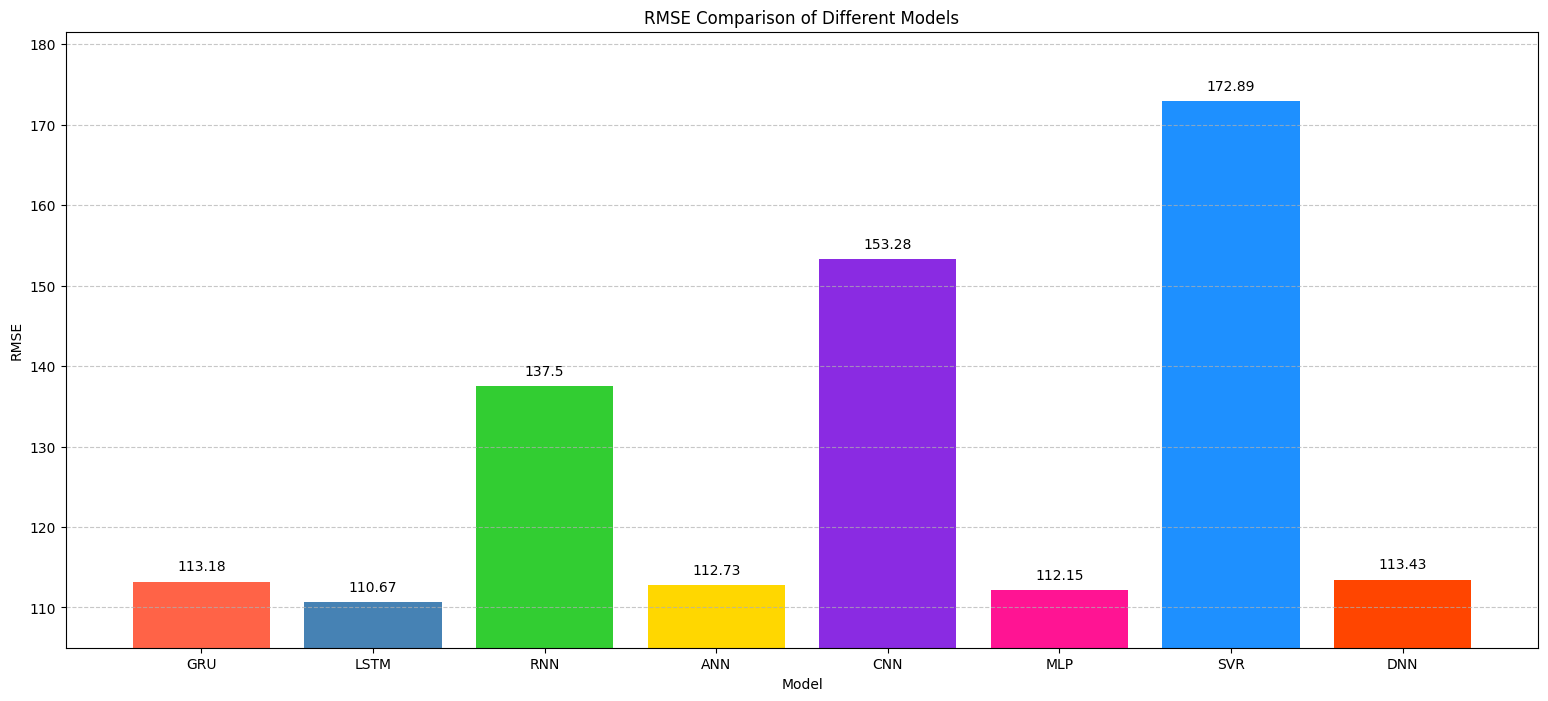

In [124]:
import matplotlib.pyplot as plt

# Define the custom color palette including a color for DNN
colors = ['#FF6347', '#4682B4', '#32CD32', '#FFD700', '#8A2BE2', '#FF1493', '#1E90FF', '#FF4500']  # Added color for DNN

# Create the bar graph
plt.figure(figsize=(19, 8))  # Adjust figure size to fit all bars

# Add grid (ruler)
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Adds horizontal grid lines

# Create bars with the updated colors
bars = plt.bar(metrics_df['Model'], metrics_df['RMSE'], color=colors)

# Add labels on top of the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 1, round(yval, 2), ha='center', va='bottom')

plt.xlabel('Model')
plt.ylabel('RMSE')
plt.title('RMSE Comparison of Different Models')

# Set the bottom value of the y-axis to 105
plt.ylim(bottom=105)

# Show the plot
plt.show()


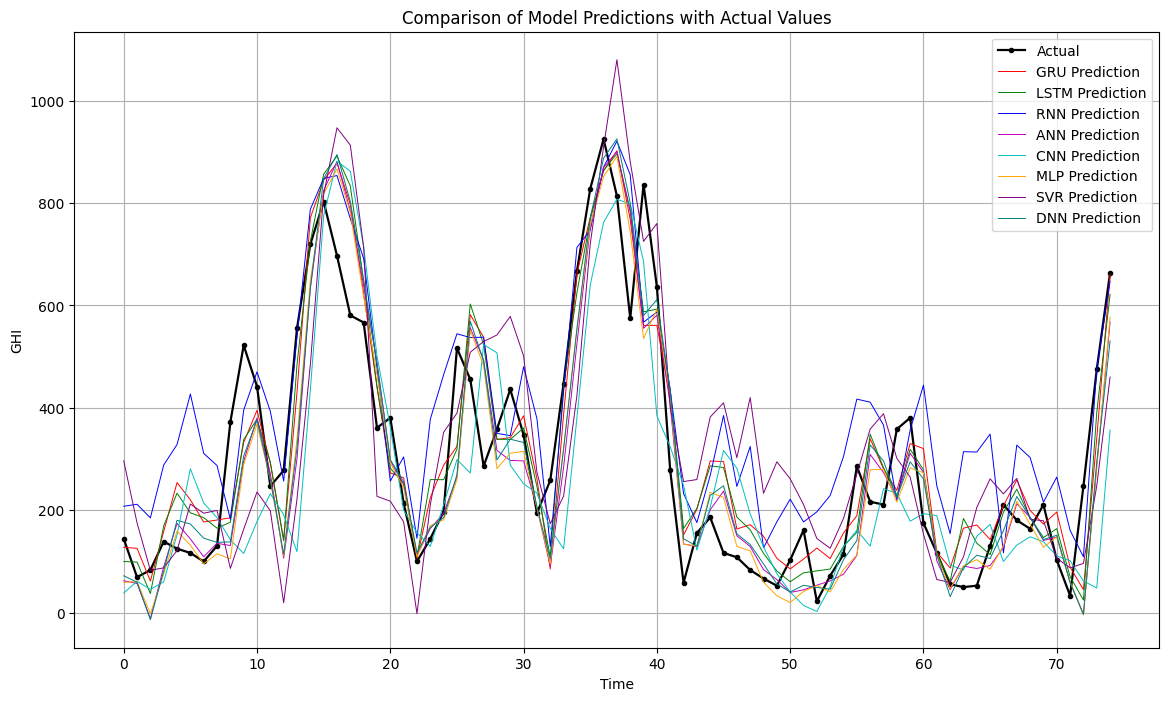

In [125]:
import matplotlib.pyplot as plt

# Number of data points to visualize
num_points = 75

# Extract the last 75 data points for actual values and model predictions
actual_values = y_test_inv.flatten()[-num_points:]
gru_pred = y_pred_GRU_inv.flatten()[-num_points:]
lstm_pred = y_pred_LSTM_inv.flatten()[-num_points:]
rnn_pred = y_pred_RNN_inv.flatten()[-num_points:]
ann_pred = y_pred_ANN_inv.flatten()[-num_points:]
cnn_pred = y_pred_CNN_inv.flatten()[-num_points:]
mlp_pred = y_pred_MLP_inv.flatten()[-num_points:]  # MLP predictions
svr_pred = y_pred_SVR_inv.flatten()[-num_points:]  # SVR predictions
dnn_pred = y_pred_DNN_inv.flatten()[-num_points:]  # Added DNN predictions

# Create a figure and axis
plt.figure(figsize=(14, 8))

# Plot the actual values with thicker line
plt.plot(actual_values, marker='.', label='Actual', color='black', linewidth=1.6)

# Plot predictions from different models with thinner lines
plt.plot(gru_pred, 'r', label='GRU Prediction', linewidth=0.7)
plt.plot(lstm_pred, 'g', label='LSTM Prediction', linewidth=0.7)
plt.plot(rnn_pred, 'b', label='RNN Prediction', linewidth=0.7)
plt.plot(ann_pred, 'm', label='ANN Prediction', linewidth=0.7)
plt.plot(cnn_pred, 'c', label='CNN Prediction', linewidth=0.7)
plt.plot(mlp_pred, 'orange', label='MLP Prediction', linewidth=0.7)  # MLP predictions
plt.plot(svr_pred, 'purple', label='SVR Prediction', linewidth=0.7)  # SVR predictions
plt.plot(dnn_pred, 'teal', label='DNN Prediction', linewidth=0.7)  # Added DNN predictions

# Add grid
plt.grid(True)

# Add titles and labels
plt.title('Comparison of Model Predictions with Actual Values')
plt.xlabel('Time')
plt.ylabel('GHI')
plt.legend()

# Show the plot
plt.show()
